In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import statannot
import pymannkendall as mk
from scipy import stats
from scipy.stats import mannwhitneyu, normaltest,wilcoxon

sns.set(font="Arial")
plt.rcParams["font.family"] = "Arial"
sns.set_style("whitegrid")
plt.rcParams["mathtext.fontset"]='custom'

In [2]:
sams=pd.read_csv("sams_after_cutoff_04102024.csv")

In [3]:
sams_matched=sams[sams['tissue_matched_primary_advanced']=='matched_tissue'].reset_index(drop=True)

In [4]:
sams_matched['source'].value_counts()

Advanced    2440
Primary     1490
Name: source, dtype: int64

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Primary vs. Advanced: Mann-Whitney-Wilcoxon test two-sided, P_val:4.496e-09 U_stat=1.657e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Primary vs. Advanced: Mann-Whitney-Wilcoxon test two-sided, P_val:4.376e-12 U_stat=1.602e+06


Text(0.8, 0.22, 'N=2440')

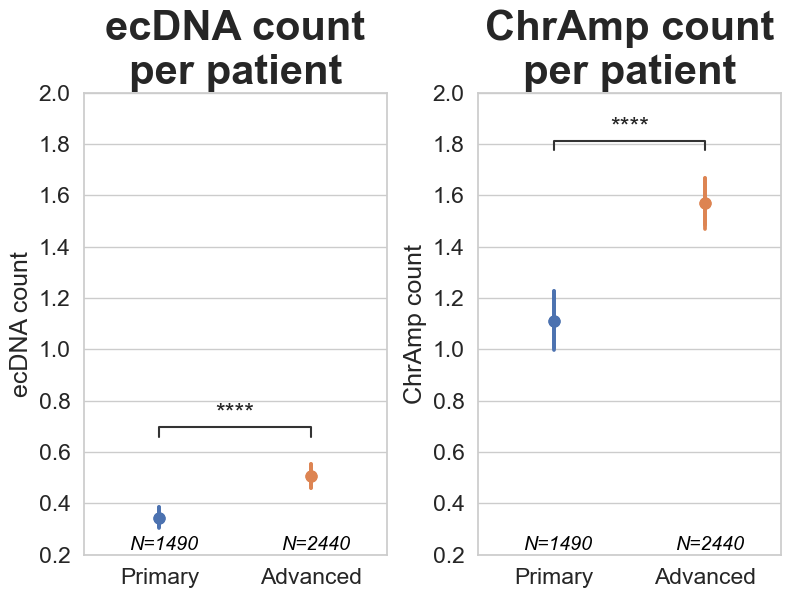

<Figure size 400x600 with 0 Axes>

<Figure size 400x600 with 0 Axes>

In [5]:
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
fig = plt.figure(figsize=(9, 6))

gs = fig.add_gridspec(1, 2, width_ratios=[1,1])
gs.update(wspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1], sharey=ax1)


# FIRST
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
plt.figure(figsize=(4,6))

plt.rcParams["font.style"] = "normal"
data=sams_matched
x='source'
y='ecDNA_count'
hue='source'

pairs=[('Primary','Advanced')]
palette="Set2"
order=['Primary','Advanced']

sns.pointplot(ax=ax1, data=data, x=x, y=y,order=order, join=False,hue=hue)
ax1.set(ylim=(0.2, 2))

annot=Annotator(ax1, pairs, data=data, x=x, y=y, order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()

ax1.set_ylabel('ecDNA count')
ax1.set_xlabel(None)

ax1.set_title("ecDNA count\nper patient",fontweight='bold',fontstyle='normal',fontsize=30)

sns.pointplot(ax=ax1,data=data, x=x, y=y,order=order, join=False,hue=hue)
ax1.set_ylabel('ecDNA count')
ax1.set_xlabel(None)
ax1.get_legend().remove()
ax1.text(-0.2,0.22,'N=1490', fontsize = 14,fontweight='normal',fontstyle='italic',color='black')
ax1.text(0.8,0.22,'N=2440', fontsize = 14,fontweight='normal',fontstyle='italic',color='black')


# SECOND
sns.set(font="Arial",font_scale=1.5,style="whitegrid")
plt.figure(figsize=(4,6))

plt.rcParams["font.style"] = "normal"
data=sams_matched
x='source'
y='Non-ecDNA_count'
hue='source'

pairs=[('Primary','Advanced'),]
palette="Set2"
order=['Primary','Advanced']

sns.pointplot(ax=ax2,data=data, x=x, y=y,order=order, join=False,hue=hue)
ax2.set(ylim=(0.2, 2))

annot=Annotator(ax2, pairs, data=data, x=x, y=y, order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='inside')
annot.apply_test()
annot.annotate()

ax2.set_ylabel('ecDNA count')
ax2.set_xlabel(None)

ax2.set_title("ChrAmp count\nper patient",fontweight='bold',fontstyle='normal',fontsize=30)

sns.pointplot(ax=ax2,data=data, x=x, y=y,order=order, join=False,hue=hue)
ax2.set_ylabel('ChrAmp count')
ax2.set_xlabel(None)
ax2.get_legend().remove()
ax2.text(-0.2,0.22,'N=1490', fontsize = 14,fontweight='normal',fontstyle='italic',color='black')
ax2.text(0.8,0.22,'N=2440', fontsize = 14,fontweight='normal',fontstyle='italic',color='black')

#fig.savefig("/images/pngs/Fig1C.png", format="png", bbox_inches="tight",dpi=1200)
#fig.savefig("/images/pdfs/Fig1C.pdf", format="pdf", bbox_inches="tight",dpi=1200)
